In [2]:
import pandas as pd

df = pd.read_csv("games_data.csv")

print(df.head())


  result  win  loss  draw white_player  black_player  white_elo  black_elo  \
0    win    1     0     0   SCHMITZ874      Blekitni        751        692   
1    win    1     0     0   SCHMITZ874     hadi13711        750        733   
2    win    1     0     0   SCHMITZ874     Supchik74        758        730   
3   loss    0     1     0   SCHMITZ874      gigi6320        751        788   
4   loss    0     1     0   SCHMITZ874  meysamshakor        735        718   

  timezone start_time  end_time  
0      UTC   18:41:04  18:49:23  
1      UTC   19:00:06  19:08:26  
2      UTC   19:08:38  19:11:05  
3      UTC   19:19:57  19:30:30  
4      UTC   20:32:21  20:40:20  


In [3]:
# determine wins and losses, winrate
result_freq = df['result'].value_counts(ascending = True)
print(result_freq.head())
wins = result_freq.win
losses = result_freq.loss
print(f"Winrate: { wins/ (wins +losses)}")

tie      52
loss    267
win     277
Name: result, dtype: int64
Winrate: 0.5091911764705882


In [4]:
#finds win rate by time
df['start_time'] = df['start_time'].apply(lambda x: x[:2])

df = df[['win', 'loss', 'draw', 'start_time']]
df = df.groupby(['start_time']).sum()

def calc_winrate(row):
    return row['win'] / (row['win'] + row['loss'])
    
df['winrate'] = df.apply(calc_winrate, axis = 1)
df

,win,loss,draw,winrate
start_time,,,,
00,14,20,3,0.411765
01,16,18,1,0.470588
02,12,12,2,0.500000
03,13,16,1,0.448276
04,22,6,3,0.785714
05,12,20,5,0.375000
06,13,9,2,0.590909
07,8,13,5,0.380952
08,12,5,0,0.705882


<AxesSubplot:xlabel='start_time'>

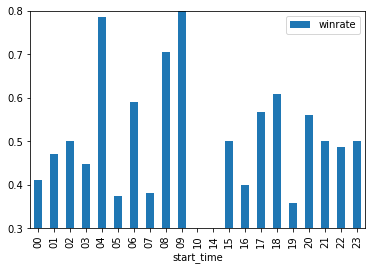

In [6]:
start_time_plot = df.plot(kind = 'bar', y= 'winrate')

start_time_plot.set_ylim(0.3, 0.8)
start_time_plot